
<a id="4"></a>

---
<font color="GREEN" size=+1><b> Abhitah Siga Al Fathir -  C2C020025 </b></font>

---

# **Import Library**

In [ ]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
import numpy as np
from scipy.stats import pearsonr

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing Dataset**

In [ ]:
#Import dataset
import os
data = pd.read_csv('/content/drive/MyDrive/Uass/hearttt(2).csv')

#Menampilkan lima baris teratas
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0.0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1.0,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0.0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0.0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1.0,1,106,0,1.9,1,3,2,0


# **Periksa kualitas data (missing value, outlier, duplikat, data imbalance)**

In [ ]:
# Melihat informasi dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1023 non-null   float64
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 112.2 KB


Terdapat beberapa tipe data pada kolom yang tidak sesuai.

**Mengubah beberapa kolom menjadi kategorikal**

In [ ]:
# Ubah daftar kolom berikut menjadi kategorikal
lst=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
data[lst] = data[lst].astype(object)

In [ ]:
data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

In [ ]:
# Pisahkan numerical dan categorical
numerical_col = data.select_dtypes(exclude=np.object_)
categorical_col = data.select_dtypes(exclude=np.number)

**Missing Value**

In [ ]:
mv = data.isnull().sum()
mv

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         2
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data['fbs'].fillna(data['fbs'].mean(),inplace=True)

In [ ]:
mv = data.isnull().sum()
mv

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Data Duplikat**

In [ ]:
# Memeriksa duplikat data
data.duplicated().sum()

721

Berdasarkan output diatas, terdapat 721 baris yang memiliki duplikat data pada dataset tersebut. Oleh karena itu, harus dilakukan drop duplikat data agar tidak ada data yang duplikat dalam dataset.

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
# Memeriksa ulang duplikat data
data.duplicated().sum()

0

**Memeriksa Outlier**

In [ ]:
## Menggunakan describe()
data.describe()

,age,trestbps,chol,fbs,thalach,oldpeak,target
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,54.315789,131.559211,246.690789,0.149004,149.664474,1.048355,0.542763
std,9.117076,17.522728,51.909318,0.355507,22.970621,1.163214,0.498989
min,29.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000
25%,47.000000,120.000000,211.000000,0.000000,133.750000,0.000000,0.000000
50%,55.000000,130.000000,240.500000,0.000000,152.500000,0.800000,1.000000
75%,61.000000,140.000000,275.000000,0.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,1.000000,202.000000,6.200000,1.000000


Berdasarkan output di atas kita dapat melihat ada perbedaan besar dalam chol 75% hingga max (274.75 hingga 564.0) demikian pula kita dapat melihat di thalch, trestbps, oldpeak sehingga mengindikasikan adanya outlier.

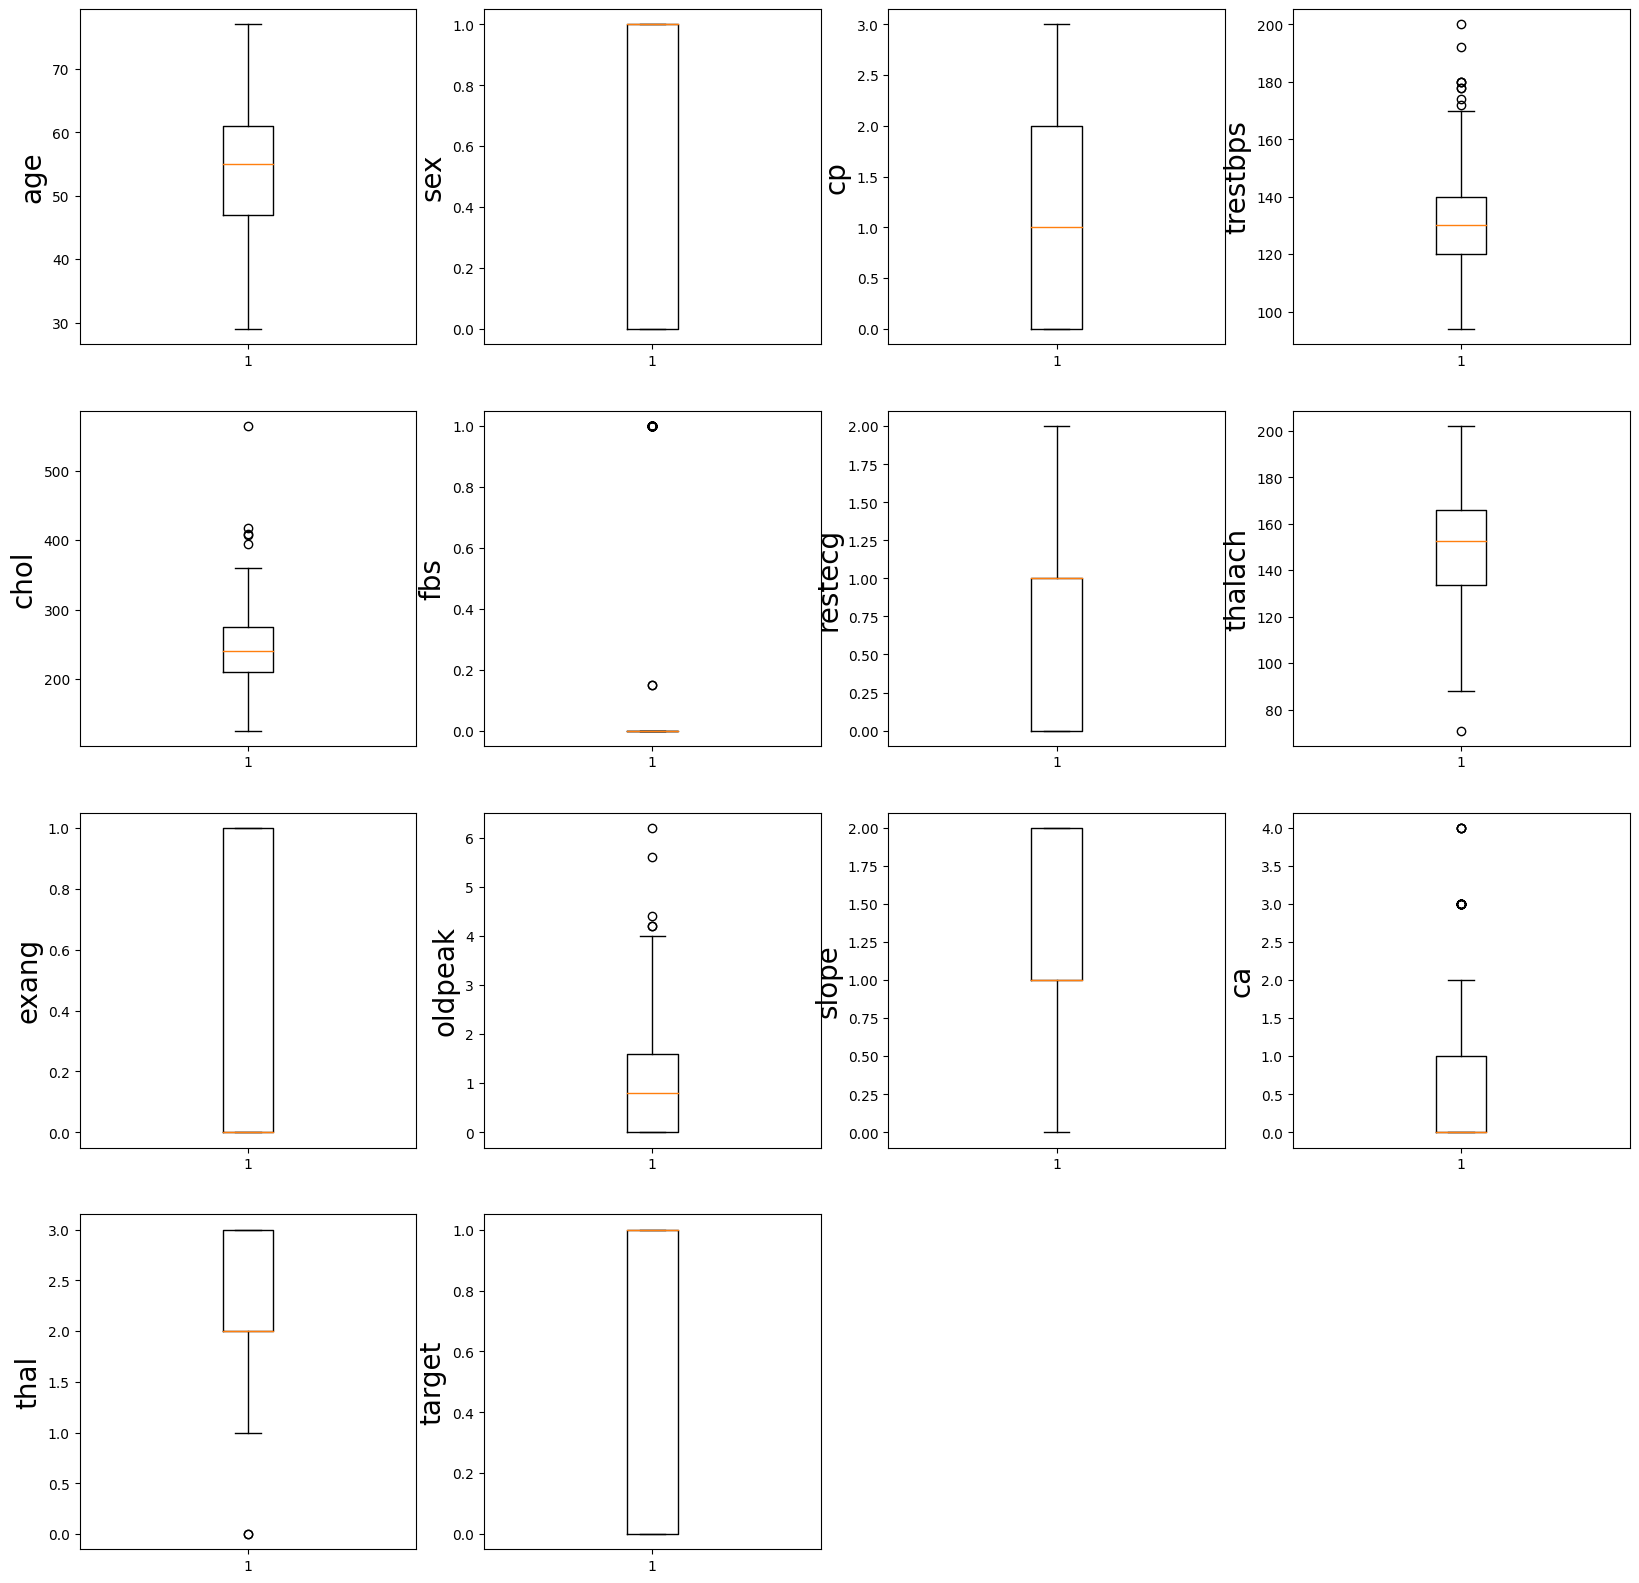

In [ ]:
plt.figure(figsize=(20,20), facecolor='white')

plotnumber=1
for column in data.columns:
    if plotnumber<15 :
        plt.subplot(4,4,plotnumber)
        plt.boxplot(data[column])
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Berdasarkan output di atas ada beberapa atribut yang memiliki outlier seperti: trestbps chol thalach oldpeak thal

**Menghapus Data Outlier**

In [ ]:
data_cleaned=pd.DataFrame()

**Menghapus outlier di trestbps**

In [ ]:
data['trestbps'].unique()

array([125, 140, 145, 148, 138, 100, 114, 160, 120, 122, 112, 132, 118,
       128, 124, 106, 104, 135, 130, 136, 180, 129, 150, 178, 146, 117,
       152, 154, 170, 134, 174, 144, 108, 123, 110, 142, 126, 192, 115,
        94, 200, 165, 102, 105, 155, 172, 164, 156, 101])

Dapat terlihat pada output diatas ada bebera outlier yang mana pada angka diatas 170-an di dalam dataset, diantaranya adalah (172, 174, 178, 180, 200). Oleh karena itu, dilakukan cleaning pada outlier.

IQR_upper_limit for column trestbps : 170
IQR_lower_limit for column trestbps : 90
outliers on right side in trestbps is 
 29     180
47     178
87     174
137    180
151    192
175    200
343    172
396    180
528    178
Name: trestbps, dtype: int64 



{'whiskers': [<matplotlib.lines.Line2D at 0x7eaf1d23c7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7eaf1d23e560>,
 'boxes': [<matplotlib.lines.Line2D at 0x7eaf1d23f910>],
 'medians': [<matplotlib.lines.Line2D at 0x7eaf1d23f460>],
 'fliers': [<matplotlib.lines.Line2D at 0x7eaf1d23f940>],
 'means': []}

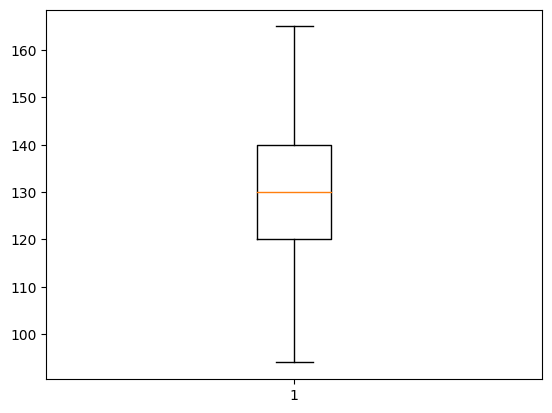

In [ ]:
q3=data["trestbps"].quantile(q=0.75)
q1=data["trestbps"].quantile(q=0.25)
IQR=q3-q1

## Memperoleh batas outlier
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)
print("IQR_upper_limit for column trestbps :",IQR_upper_limit)
print("IQR_lower_limit for column trestbps :",IQR_lower_limit)

## menemukan and treating outliers-both lower dan upper end
k1=data[data["trestbps"]>IQR_upper_limit]
print("outliers on right side in trestbps is \n",k1["trestbps"],"\n")
data_cleaned=data[data["trestbps"]<IQR_upper_limit]
plt.boxplot(data_cleaned["trestbps"])

**Menghapus outlier di chol**

In [ ]:
data['chol'].unique()

array([212, 203, 174, 294, 248, 318, 289, 249, 286, 149, 341, 210, 298,
       204, 308, 266, 244, 211, 185, 223, 208, 252, 209, 307, 233, 319,
       256, 327, 169, 131, 269, 196, 231, 213, 271, 263, 229, 360, 258,
       330, 342, 226, 228, 278, 230, 283, 241, 175, 188, 217, 193, 245,
       232, 299, 288, 197, 315, 215, 164, 326, 207, 177, 257, 255, 187,
       201, 220, 268, 267, 236, 303, 282, 126, 309, 186, 275, 281, 206,
       335, 218, 254, 295, 417, 260, 240, 302, 192, 225, 325, 235, 274,
       234, 182, 167, 172, 321, 300, 199, 564, 157, 304, 222, 184, 354,
       160, 247, 239, 246, 409, 293, 180, 250, 221, 200, 227, 243, 311,
       261, 242, 205, 306, 219, 353, 198, 394, 183, 237, 224, 265, 313,
       340, 259, 270, 216, 264, 276, 322, 214, 273, 253, 176, 284, 305,
       168, 407, 290, 277, 262, 195, 166, 178, 141])

Dapat terlihat pada output diatas ada bebera outlier yang mana pada angka diatas 390 - 500-an di dalam dataset, Oleh karena itu, dilakukan cleaning pada outlier.

IQR_upper_limit for column chol : 368
IQR_lower_limit for column chol : 116
outliers on right side in chol is 
 123    417
158    564
179    409
255    394
450    407
Name: chol, dtype: int64 



{'whiskers': [<matplotlib.lines.Line2D at 0x7eaf1d2253f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7eaf1d23ee90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7eaf1d227970>],
 'medians': [<matplotlib.lines.Line2D at 0x7eaf1d225bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7eaf1d226350>],
 'means': []}

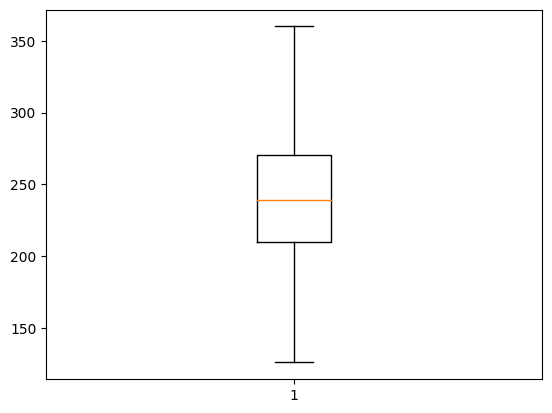

In [ ]:
q3=data_cleaned["chol"].quantile(q=0.75)
q1=data_cleaned["chol"].quantile(q=0.25)
IQR=q3-q1

# Memperoleh batas outlier
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)
print("IQR_upper_limit for column chol :",IQR_upper_limit)
print("IQR_lower_limit for column chol :",IQR_lower_limit)

## menemukan and treating outliers-both lower dan upper end
k1=data_cleaned[data_cleaned["chol"]>IQR_upper_limit]
print("outliers on right side in chol is \n",k1["chol"],"\n")
data_cleaned=data_cleaned[data_cleaned["chol"]<IQR_upper_limit]
plt.boxplot(data_cleaned["chol"])

**Menghapus outlier di oldpeak**

In [ ]:
data['oldpeak'].unique()

array([1. , 3.1, 2.6, 0. , 1.9, 4.4, 0.8, 3.2, 1.6, 3. , 0.7, 4.2, 1.5,
       2.2, 1.1, 0.3, 0.4, 0.6, 3.4, 2.8, 1.2, 2.9, 3.6, 1.4, 0.2, 2. ,
       5.6, 0.9, 1.8, 6.2, 4. , 2.5, 0.5, 0.1, 2.1, 2.4, 3.8, 2.3, 1.3,
       3.5])

Dapat terlihat pada output diatas ada bebera outlier yang mana pada angka diatas nilai 4 -6 di dalam dataset, Oleh karena itu, dilakukan cleaning pada outlier.

IQR_upper_limit for column oldpeak : 4
IQR_lower_limit for column oldpeak : -2
outliers on right side in oldpeak is 
 6     4.4
13    4.2
54    5.6
69    6.2
Name: oldpeak, dtype: float64 



{'whiskers': [<matplotlib.lines.Line2D at 0x7eaf1d208970>,
 'caps': [<matplotlib.lines.Line2D at 0x7eaf1d209720>,
 'boxes': [<matplotlib.lines.Line2D at 0x7eaf1d208430>],
 'medians': [<matplotlib.lines.Line2D at 0x7eaf1d209fc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7eaf1d20a440>],
 'means': []}

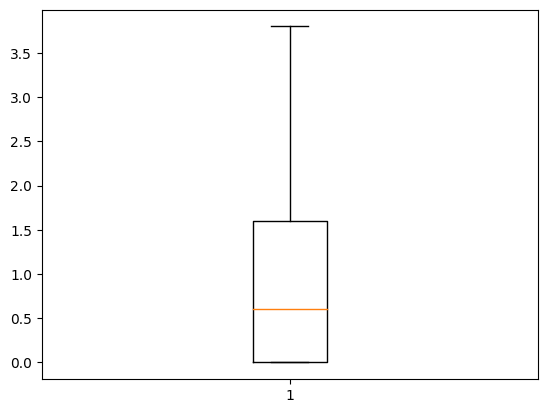

In [ ]:
q3=data_cleaned["oldpeak"].quantile(q=0.75)
q1=data_cleaned["oldpeak"].quantile(q=0.25)
IQR=q3-q1
## Memperoleh batas outlier
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)
print("IQR_upper_limit for column oldpeak :",IQR_upper_limit)
print("IQR_lower_limit for column oldpeak :",IQR_lower_limit)

## menemukan and treating outliers-both lower dan upper end
k1=data_cleaned[data_cleaned["oldpeak"]>IQR_upper_limit]
print("outliers on right side in oldpeak is \n",k1["oldpeak"],"\n")
data_cleaned=data_cleaned[data_cleaned["oldpeak"]<IQR_upper_limit]
plt.boxplot(data_cleaned["oldpeak"])

**Menghapus outlier di thalach**

In [ ]:
data['thalach'].unique()

array([168, 155, 125, 161, 106, 122, 140, 145, 144, 116, 136, 192, 156,
       142, 109, 162, 165, 148, 172, 173, 146, 179, 152, 117, 115, 112,
       163, 147, 182, 105, 150, 151, 169, 166, 178, 132, 160, 123, 139,
       111, 180, 164, 202, 157, 159, 170, 138, 175, 158, 126, 143, 141,
       167,  95, 190, 118, 103, 181, 108, 177, 134, 120, 171, 149, 154,
       153,  88, 174, 114, 195, 133,  96, 124, 131, 185, 194, 128, 127,
       186, 184, 188, 130,  71, 137,  99, 121, 187,  97,  90, 129, 113])

Dapat terlihat pada output diatas ada bebera outlier yang mana pada angka diatas adalah 71. Oleh karena itu, dilakukan cleaning pada outlier.

IQR_lower_limit for column oldpeak : 78
outliers on left side in thalachh is 
 267    71
Name: thalach, dtype: int64 



{'whiskers': [<matplotlib.lines.Line2D at 0x7eaf205f8a00>,
 'caps': [<matplotlib.lines.Line2D at 0x7eaf204956f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7eaf205fa770>],
 'medians': [<matplotlib.lines.Line2D at 0x7eaf205f8850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7eaf205f8490>],
 'means': []}

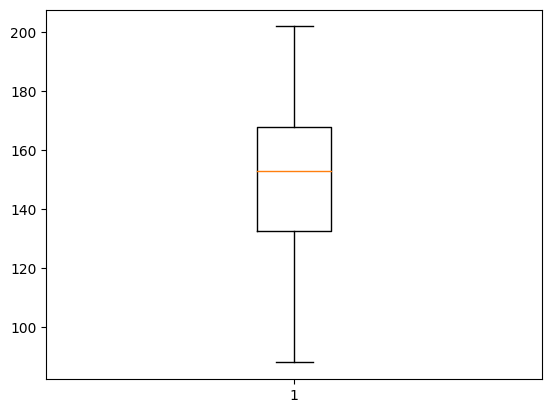

In [ ]:
q3=data_cleaned["thalach"].quantile(q=0.75)
q1=data_cleaned["thalach"].quantile(q=0.25)
IQR=q3-q1
## Memperoleh batas outlier
IQR_lower_limit=int(q1-1.5*IQR)
print("IQR_lower_limit for column oldpeak :",IQR_lower_limit)

## menemukan and treating outliers-both lower dan upper end
k1=data_cleaned[data_cleaned["thalach"]<IQR_lower_limit]
print("outliers on left side in thalachh is \n",k1["thalach"],"\n")
data_cleaned=data_cleaned[data_cleaned["thalach"]>IQR_lower_limit]
plt.boxplot(data_cleaned["thalach"])

**Kembali memeriksa outlier**

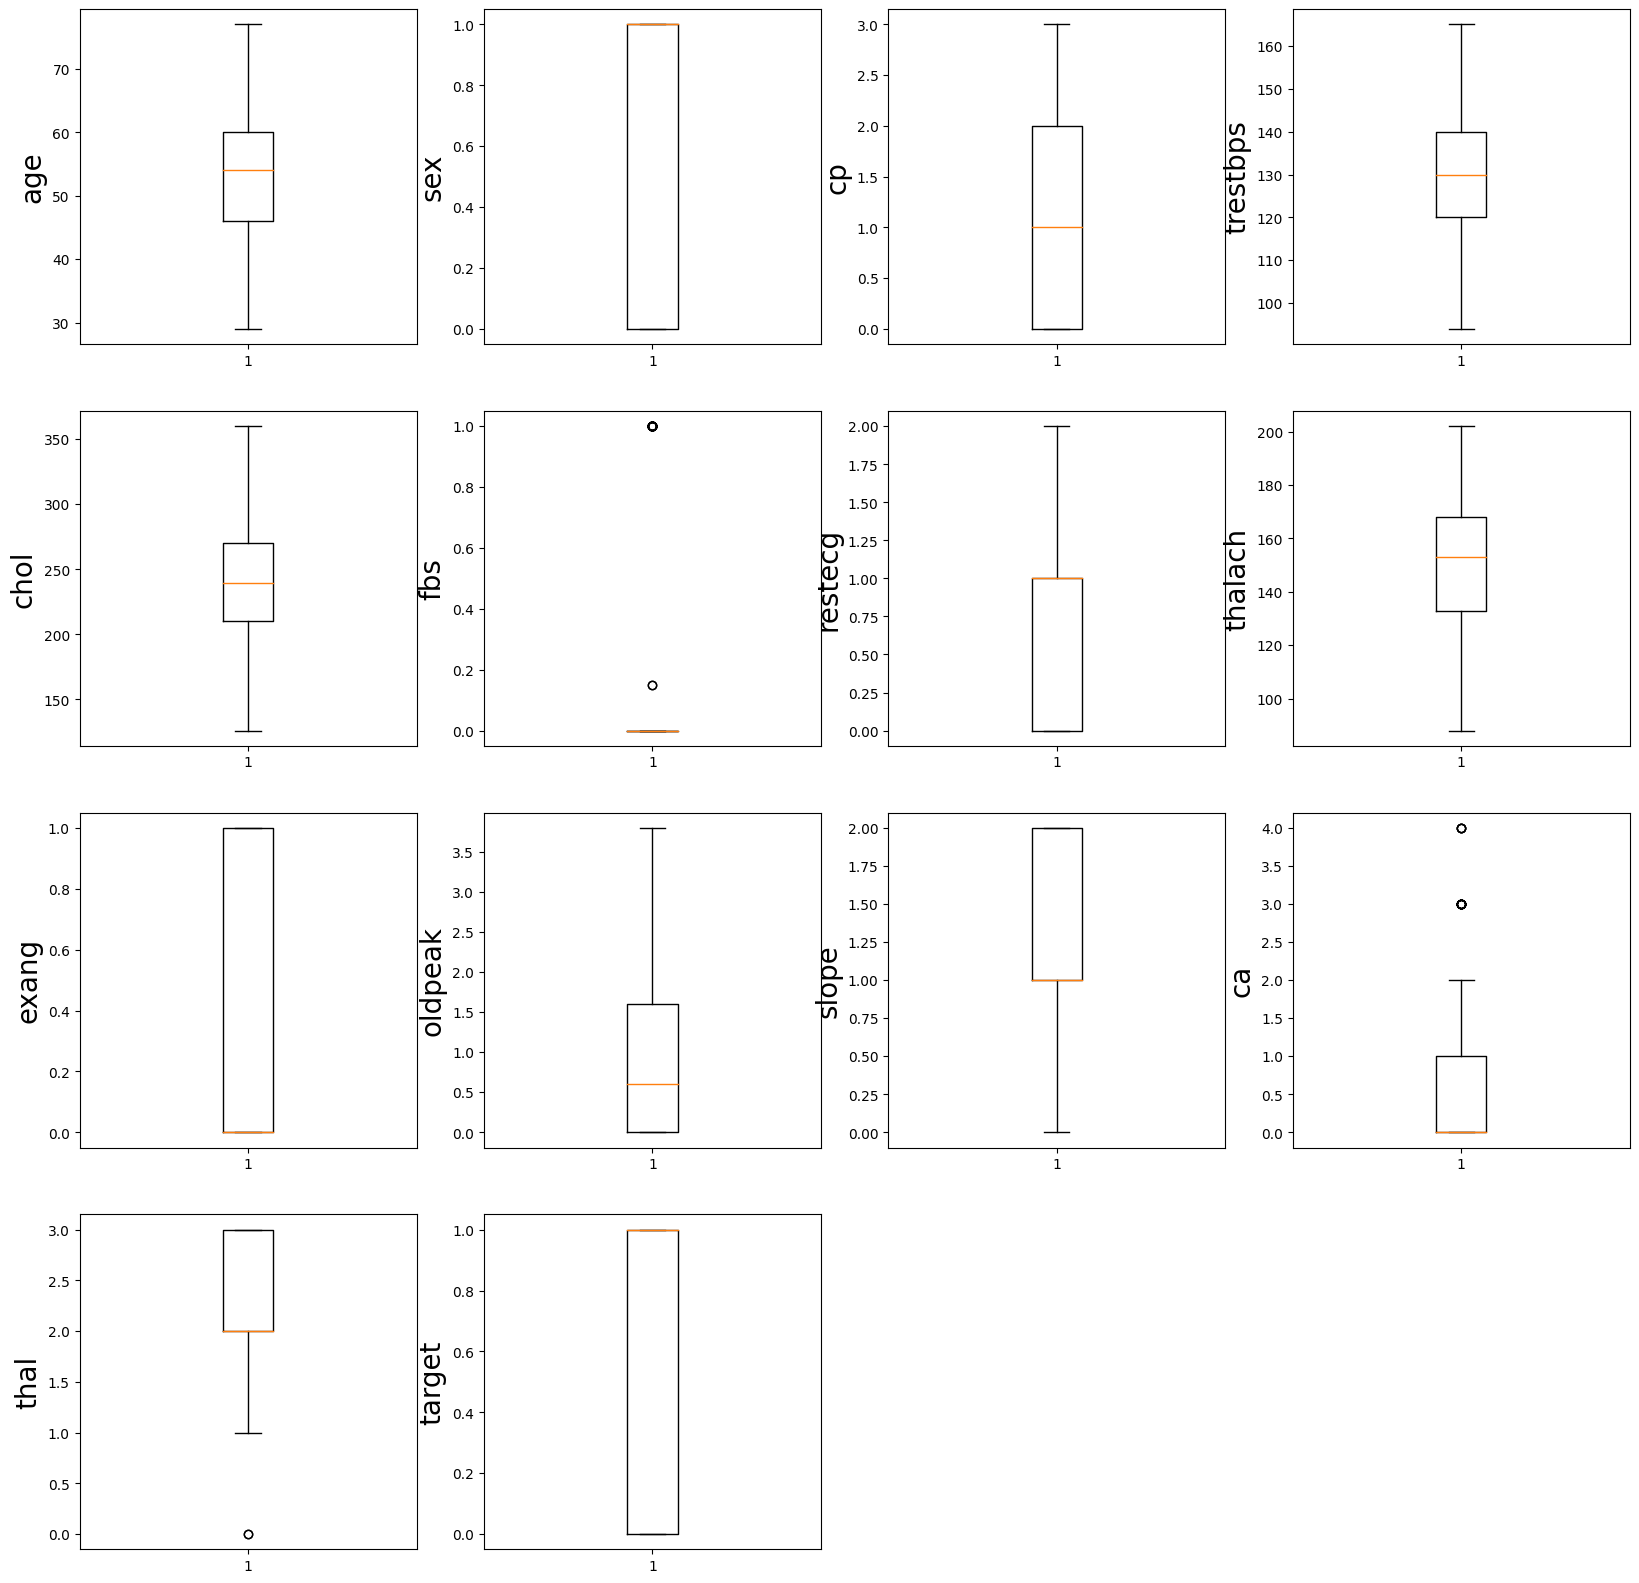

In [ ]:
plt.figure(figsize=(20,20), facecolor='white')

plotnumber=1
for column in data_cleaned.columns:
    if plotnumber<15 :
        plt.subplot(4,4,plotnumber)
        plt.boxplot(data_cleaned[column])
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.show()

**Memeriksa korelasi antar feature**

<ipython-input-52-252db0176696>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=data.corr()


<Axes: >

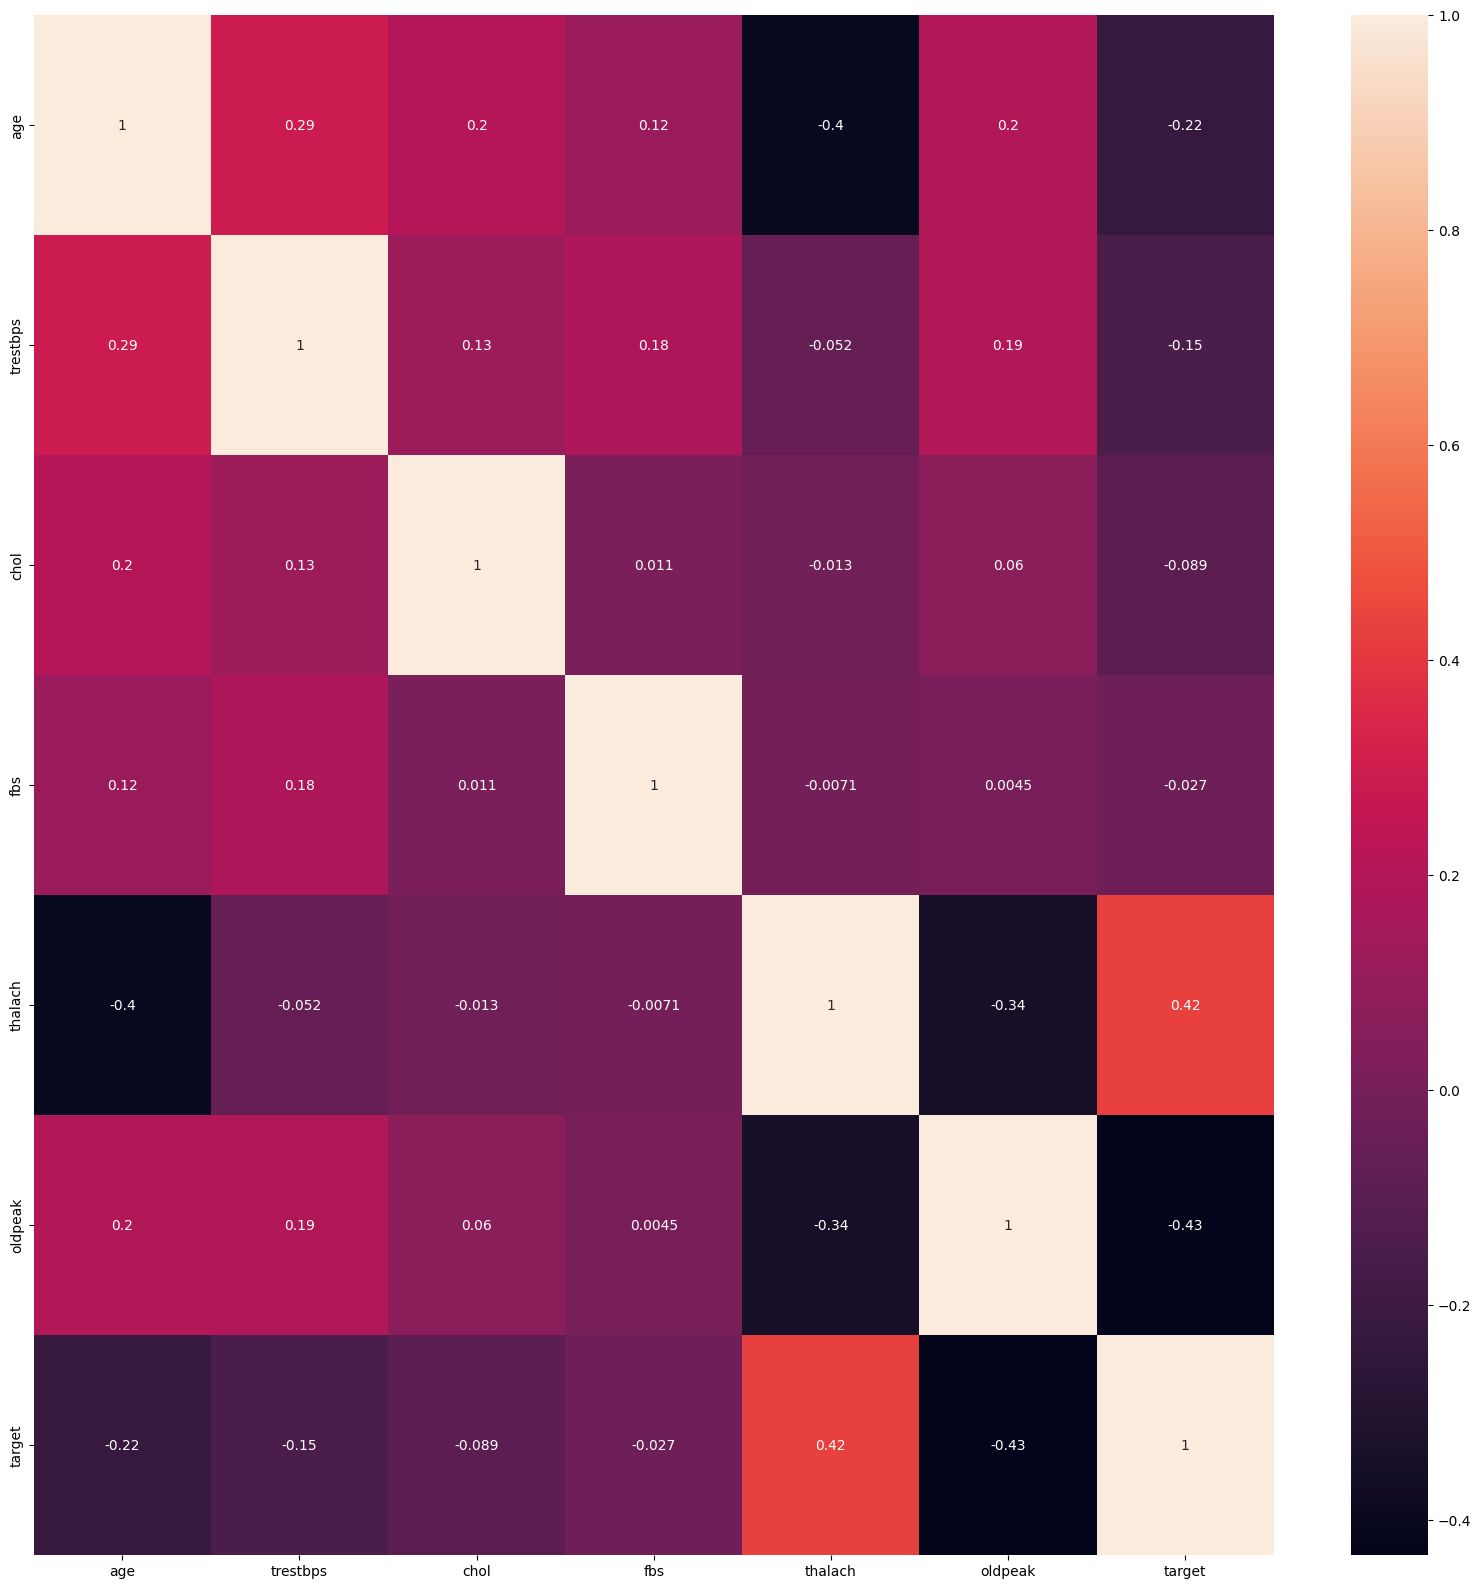

In [ ]:
plt.figure(figsize=(20,20))
cor=data.corr()
sns.heatmap(cor,annot=True)

In [ ]:
cor_matrix = data.corr()
cor_matrix

<ipython-input-53-168a0672b17d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = data.corr()


,age,trestbps,chol,fbs,thalach,oldpeak,target
age,1.000000,0.285384,0.201388,0.118208,-0.399677,0.198098,-0.220615
trestbps,0.285384,1.000000,0.126291,0.177951,-0.052443,0.194363,-0.148064
chol,0.201388,0.126291,1.000000,0.011352,-0.013093,0.060306,-0.089315
fbs,0.118208,0.177951,0.011352,1.000000,-0.007130,0.004487,-0.026736
thalach,-0.399677,-0.052443,-0.013093,-0.007130,1.000000,-0.343533,0.423656
oldpeak,0.198098,0.194363,0.060306,0.004487,-0.343533,1.000000,-0.432583
target,-0.220615,-0.148064,-0.089315,-0.026736,0.423656,-0.432583,1.000000


## **Memisahkan variabel dependen dan independen**

Variabel dependen yang digunakan adalah data pada kolom 'target', kolom lainnya merupakan variabel independen. Pisahkan variabel independen sebagai X dan dependen sebagai y!

In [ ]:
X = data.drop('target', axis=1)
y = data['target']

In [ ]:
#Melihat kolom yang termasuk variable indepnden
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0.0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1.0,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0.0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0.0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1.0,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0.0,0,115,0,1.5,1,0,2
733,44,0,2,108,141,0.0,1,175,0,0.6,1,0,2
739,52,1,0,128,255,0.0,1,161,1,0.0,2,1,3
843,59,1,3,160,273,0.0,0,125,0,0.0,2,0,2


## **Spltting Dataset**

Pisahkan dataset menjadi training dan testing dataset dengan perbandingan 80:20!

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(243, 13)
(61, 13)
(243,)
(61,)


Proses splitting data merupakan pembagian data menjadi data untuk training dan data untuk testing dimana disini saya membagi menjadi 80% data training dan 20% data testing, karena semakin banyak data yang dilatih mesin akan semakin banyak belajar sehingga bisa optimal dalam membangun model nantinya, dimana dengan random state sebanyak 100.

## **Model training dan testing**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression

In [ ]:

model = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
X_train_prediction = model.predict(X_train)
Training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [ ]:
print('akurasi data training :', Training_data_accuracy)

akurasi data training : 0.8477366255144033


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [ ]:
print('akurasi data testing :', test_data_accuracy)

akurasi data testing : 0.8852459016393442


In [ ]:
input_data = (53,1,0,140,203,1,0,155,1,3.1,0,0,3)
input_data_as_numpy_array = np.array(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print('Pasien tidak Terkena penyakit jantung')
else:
  print('Pasien terkena penyakit jantung')

[0]
Pasien tidak Terkena penyakit jantung


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

In [ ]:
file_name = 'penyakit_jantung.sav'
pickle.dump(model, open(file_name, 'wb'))